#  Dual ML System for Smartphone Price Prediction

## Overview:

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

### What’s the Project About?

This project aims to build a machine learning system that predicts the price of a mobile phone based on its hardware specifications. The solution supports two modes:

* Regression – to predict the exact price (₹ value)

* Classification – to predict the price category (e.g., Low, Mid, High, Premium)

### We're going to take the following approach:

#### 1.Problem definition
#### 2.Data
#### 3.Evaluation
#### 4.Features
#### 5.Modelling


## 1. Problem Definition

Given a dataset of mobile phones with their technical specifications (RAM, storage, camera quality, battery capacity, processor type, brand, 5G support, etc.), build machine learning models that:

### Real-World Context:

With thousands of smartphones on the market, estimating a fair price for a mobile phone based on its features is valuable for:

* E-commerce platforms to optimize recommendations and search filters

* Retailers to adjust pricing strategies

* Consumers to make better buying decisions

* Manufacturers to identify competitive pricing before product launches



### Desired Outcomes:

* Develop accurate models for both tasks

* Analyze feature importance

* Compare multiple algorithms (e.g., Linear Regression, Random Forest, XGBoost)

* Tune hyperparameters using GridSearchCV

* Visualize model performance using plots and metrics

## 3. Evaluation



If we can achieve at least **95% classification accuracy** in predicting the **price category** (Low, Medium, High, Premium), and a **Root Mean Squared Error (RMSE) below ₹1500** when predicting the **exact price**, we will consider the project successful and viable for further deployment.

###  Success Criteria

| Task              | Metric              | Target Threshold   |
|-------------------|---------------------|--------------------|
| Classification    | Accuracy             | ≥ 95%              |
| Regression        | RMSE (₹)             | ≤ ₹1500            |
| Regression        | R² Score             | ≥ 0.90             |

These targets will guide our model evaluation and help determine if the models are reliable enough for real-world applications such as e-commerce pricing systems or recommendation engines.


## Features

This dataset contains various features of mobile phones, both hardware and connectivity specifications, along with target variables for 
classification and regression tasks.

| Feature             | Description |
|---------------------|-------------|
| `battery_power`     | Battery capacity of the mobile phone in mAh. Higher values indicate longer usage time. |
| `blue`              | Bluetooth support (1 = Yes, 0 = No). Indicates if the device supports Bluetooth. |
| `clock_speed`       | Clock speed of the processor (in GHz). Higher values mean faster CPU performance. |
| `dual_sim`          | Dual SIM support (1 = Yes, 0 = No). Shows whether the device supports two SIM cards. |
| `fc`                | Front camera resolution (in megapixels). Affects the quality of selfies and video calls. |
| `four_g`            | 4G network support (1 = Yes, 0 = No). Indicates compatibility with 4G networks. |
| `int_memory`        | Internal memory of the device (in GB). Determines storage capacity for apps and media. |
| `m_dep`             | Mobile depth (in cm). Part of the physical size of the phone. |
| `mobile_wt`         | Weight of the phone (in grams). May influence portability and build feel. |
| `n_cores`           | Number of processor cores. More cores usually enhance multitasking and performance. |
| `pc`                | Primary (rear) camera resolution (in megapixels). Affects photo and video quality. |
| `px_height`         | Height of the screen resolution (in pixels). Used in screen quality calculations. |
| `px_width`          | Width of the screen resolution (in pixels). Combined with height to determine display clarity. |
| `ram`               | RAM capacity (in MB). Essential for multitasking and smooth app performance. |
| `sc_h`              | Height of the mobile screen (in cm). Used to compute screen area. |
| `sc_w`              | Width of the mobile screen (in cm). Used to compute screen area. |
| `talk_time`         | Maximum continuous talk time the phone can support (in hours). Reflects battery endurance. |
| `three_g`           | 3G network support (1 = Yes, 0 = No). Shows compatibility with 3G networks. |
| `touch_screen`      | Touch screen support (1 = Yes, 0 = No). Indicates if the phone has a touch screen interface. |
| `wifi`              | Wi-Fi support (1 = Yes, 0 = No). Determines if the device can connect to wireless networks. |
| `Screen Dimension`  | Engineered feature: Screen area calculated as `sc_h × sc_w`. |
| `price_range`       | Classification target variable: 0 = Low, 1 = Medium, 2 = High, 3 = Premium. |
| `price`             | Regression target variable: Simulated actual price of the phone (in ₹). |


## Preparing the tools

In [136]:
## Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [137]:
## sklearn libraries for Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [138]:
## sklearn libraries for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [139]:
## (Classification + Regression) matrix
from sklearn.metrics import classification_report, confusion_matrix, precision_score,f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, r2_score,ConfusionMatrixDisplay
from sklearn.metrics import auc,roc_curve,recall_score

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Load Data

### Let's read our data in using pandas:

In [161]:
## Load data 
train_df = pd.read_csv("mobile_train_dataset.csv")
test_df = pd.read_csv("mobile_test_dataset.csv")

Show an overview of our data:

In [162]:
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [163]:
test_df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


## Modelling

## Let's take a Look at our train dataset :

In [144]:
train_df.shape # 2000 rows and 21 features

(2000, 21)

In [145]:
train_df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [146]:
train_df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [147]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [148]:
# Are there any missing values?
train_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [149]:
#Transpose the describe the dataframe
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


## Let's take a Look at our test dataset :

In [151]:
test_df.shape # 2000 rows and 21 features

(1000, 21)

In [152]:
test_df.shape # 2000 rows and 21 features

(1000, 21)

In [153]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [154]:
# Are there any missing values?
test_df.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [155]:
#Transpose the describe the dataframe
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0


## Data Visualization

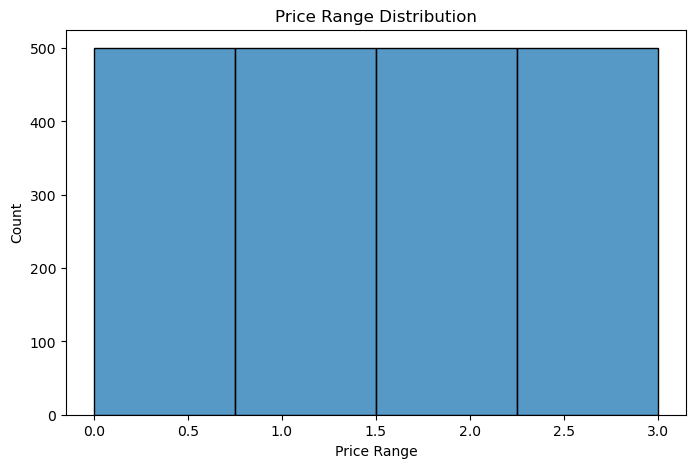

In [156]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['price_range'], kde=False, bins=4)
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

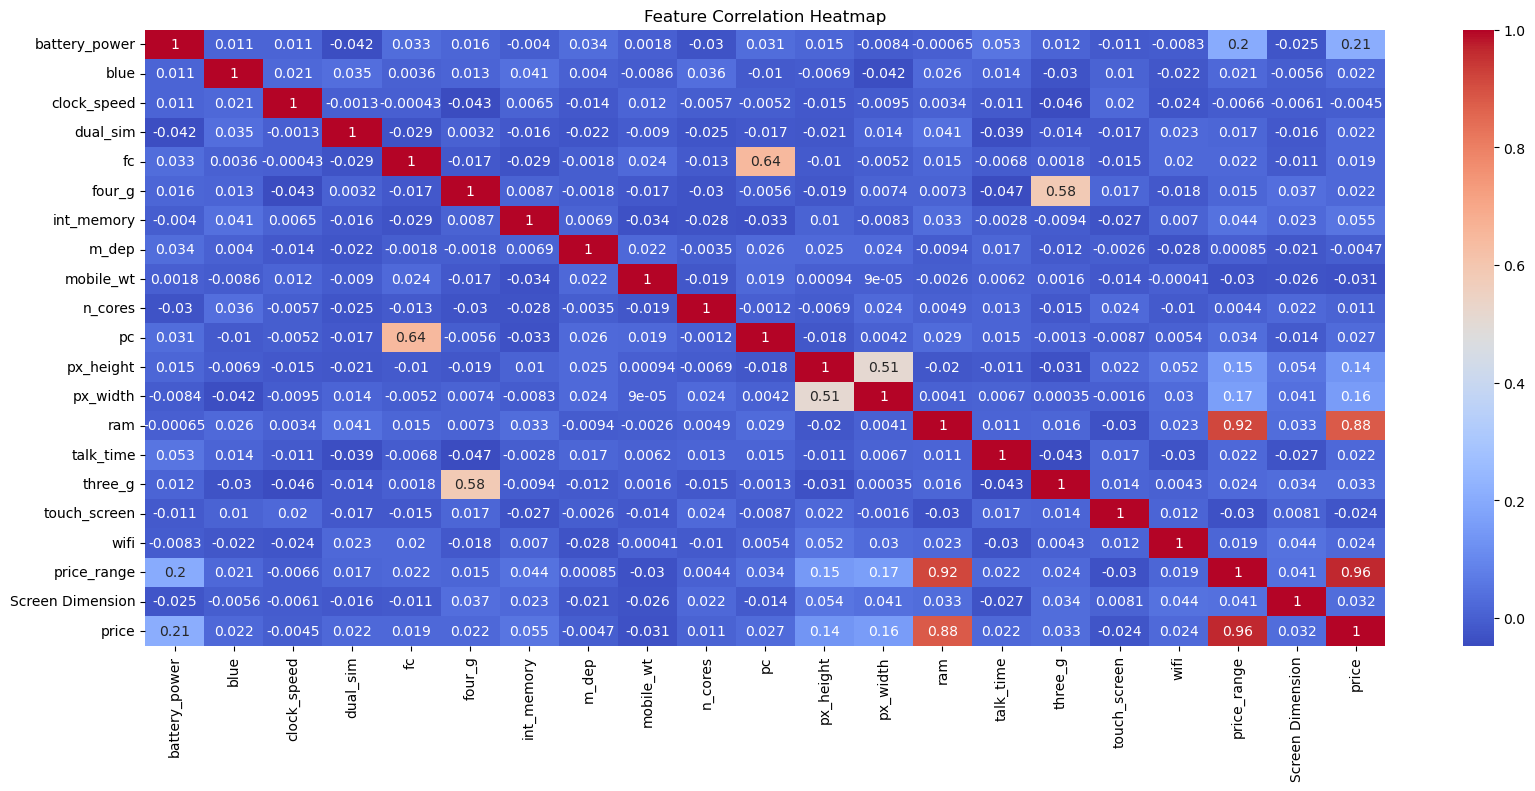

In [187]:
plt.figure(figsize=(20, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [164]:
numerical_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                  'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'talk_time']


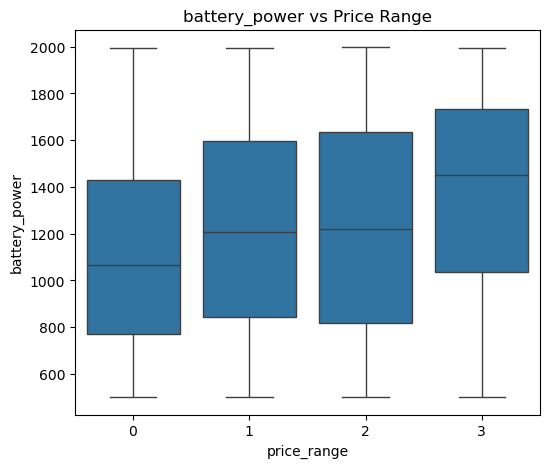

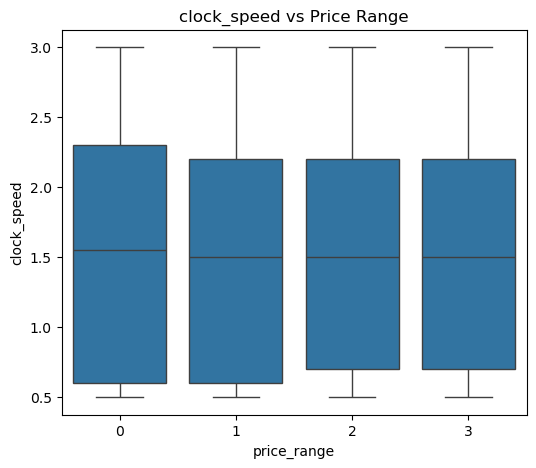

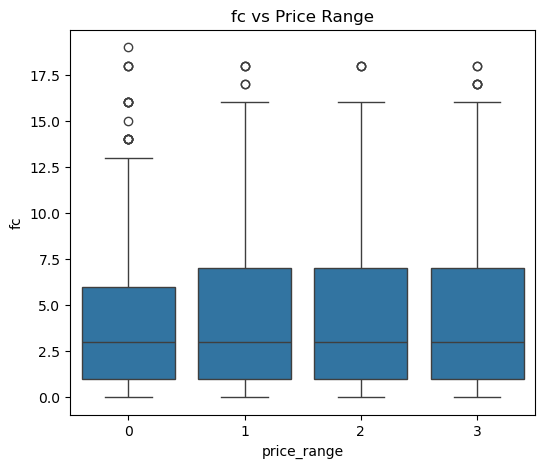

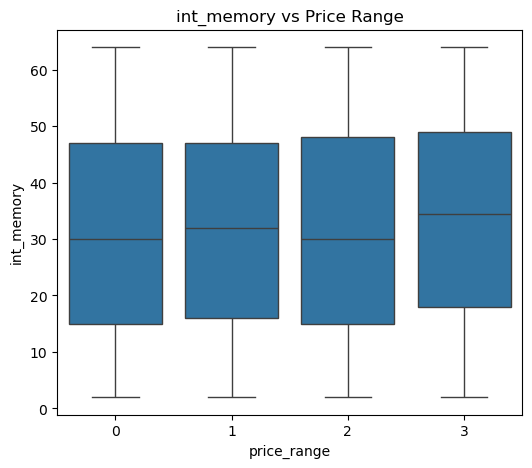

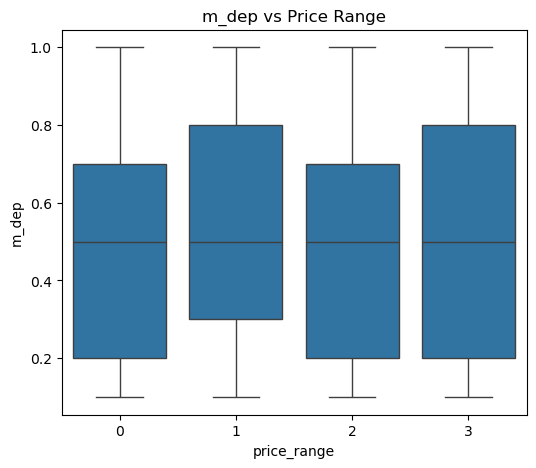

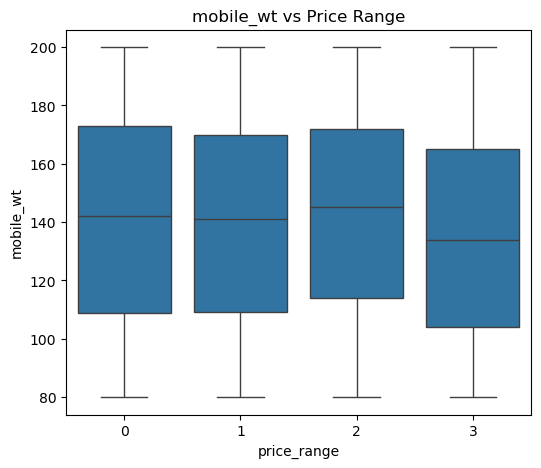

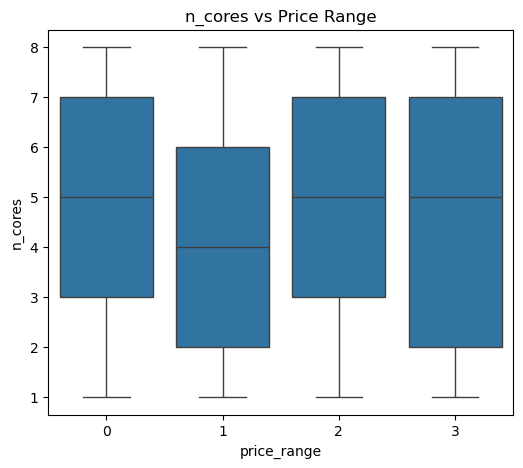

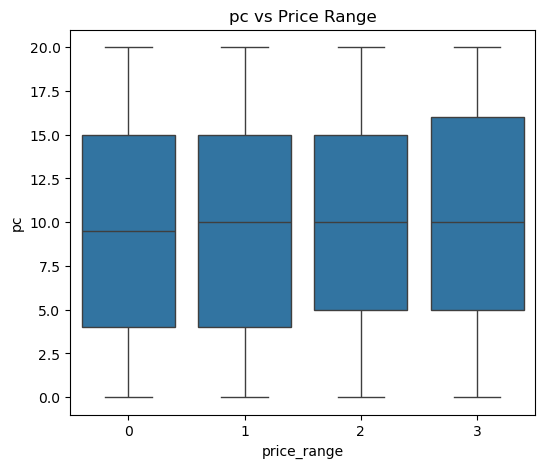

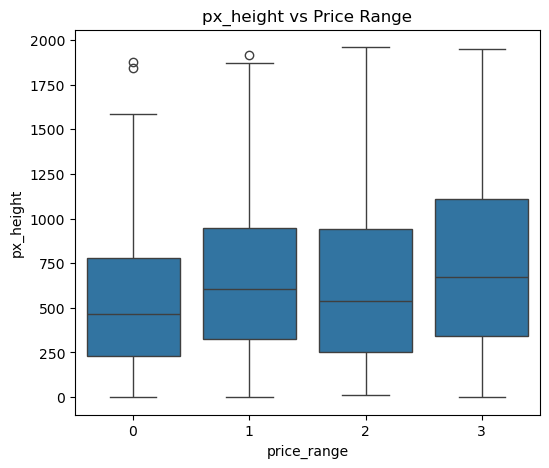

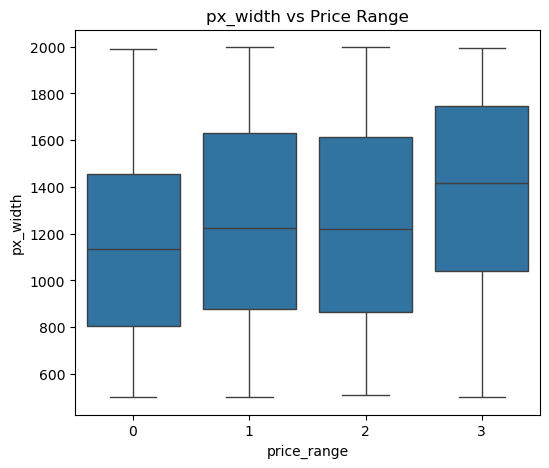

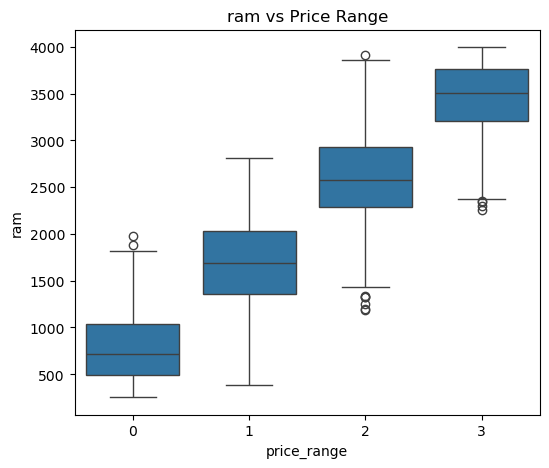

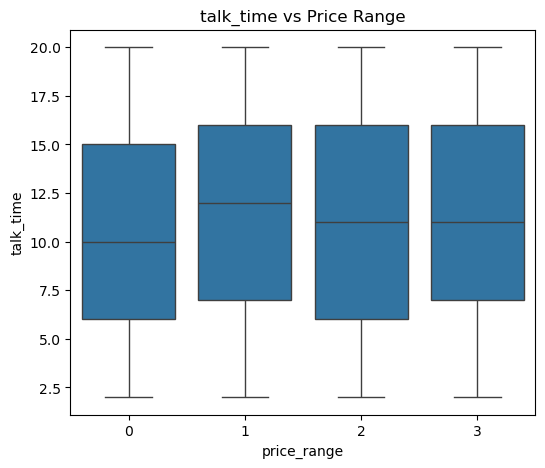

In [165]:
for col in numerical_cols:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='price_range', y=col, data=train_df)
    plt.title(f'{col} vs Price Range')
    plt.show()


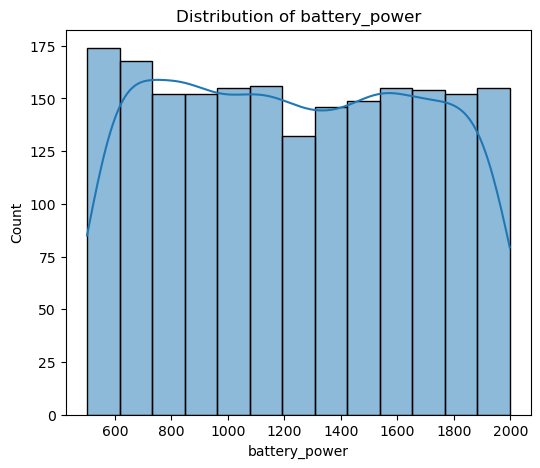

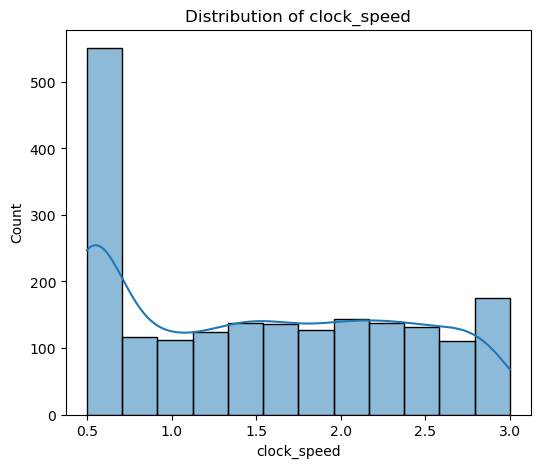

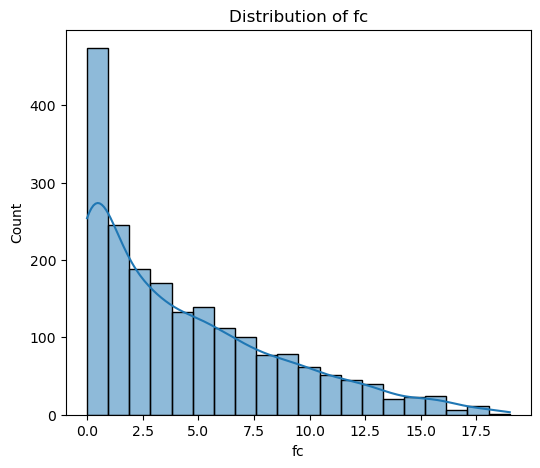

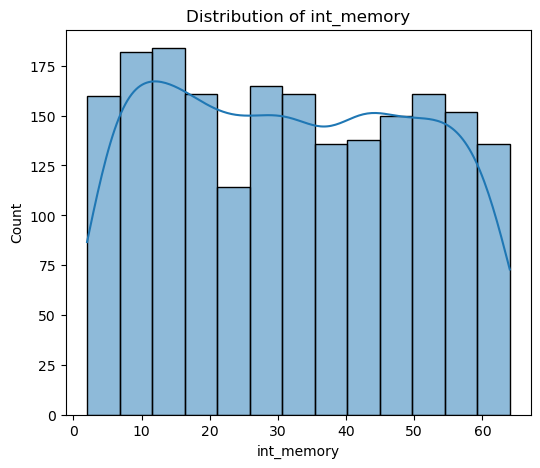

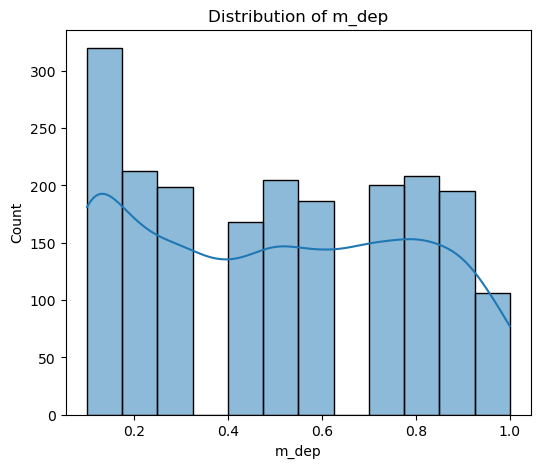

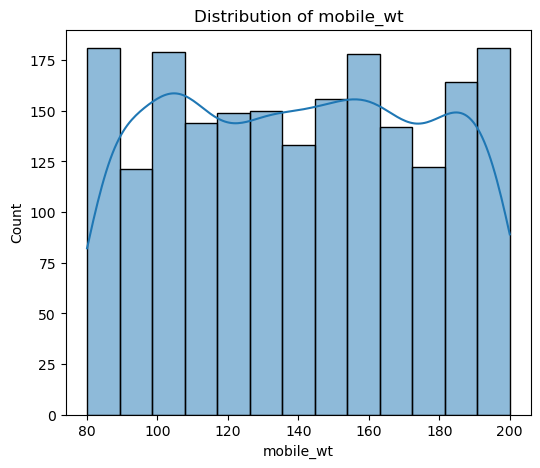

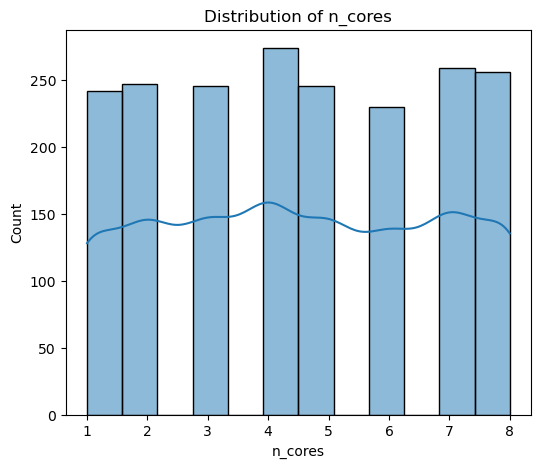

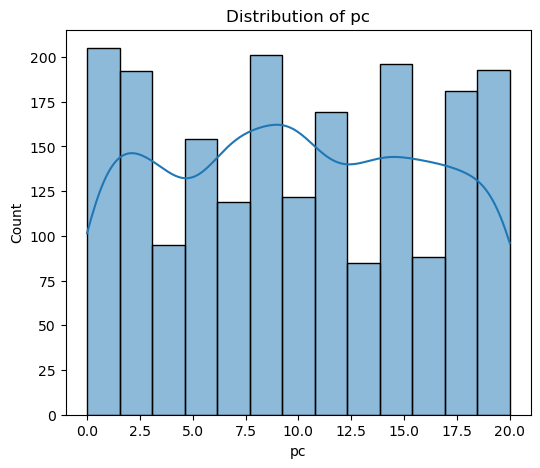

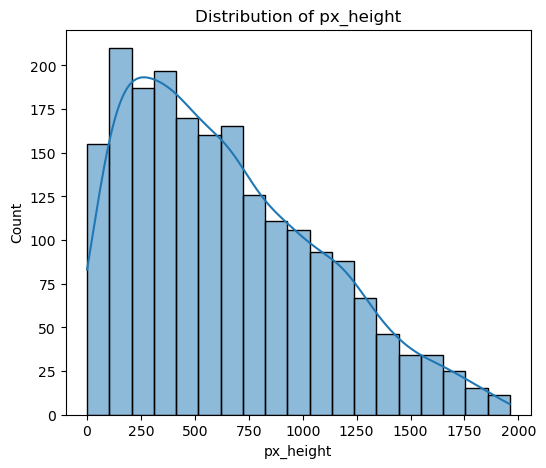

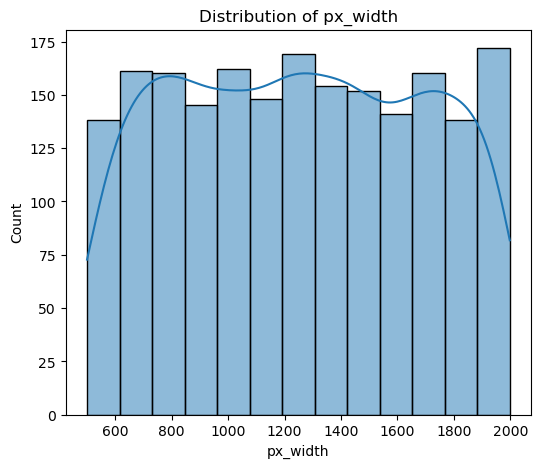

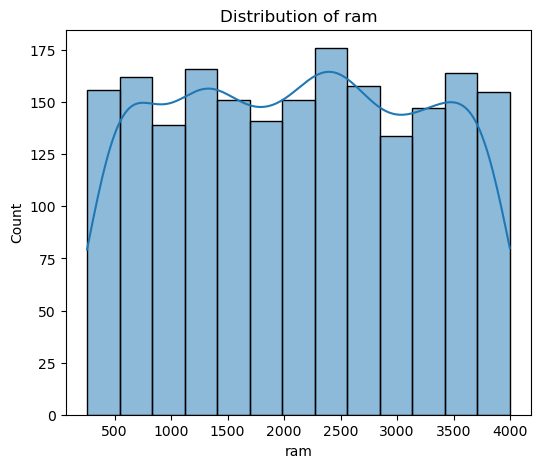

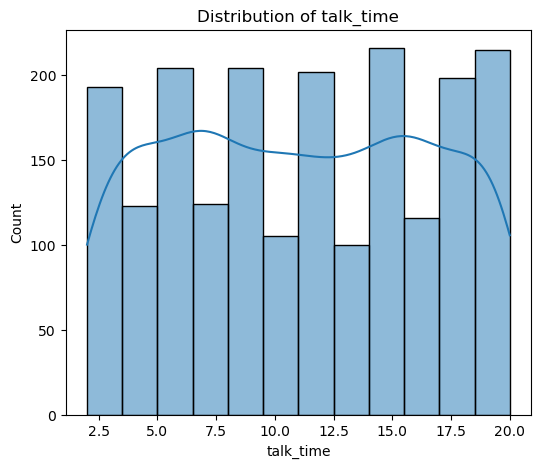

In [166]:
for col in numerical_cols:
    plt.figure(figsize=(6, 5))
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [167]:
binary_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

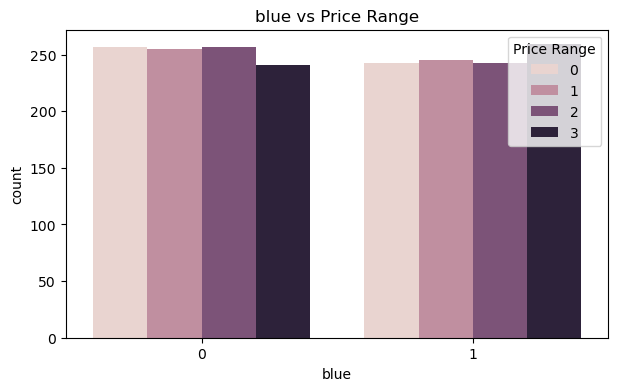

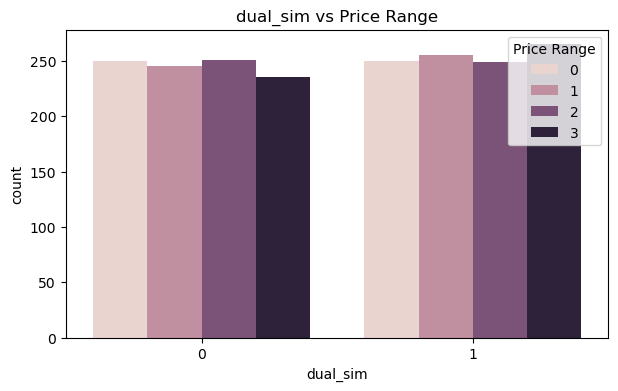

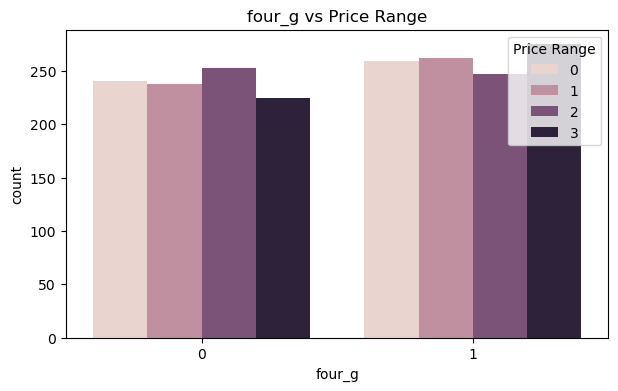

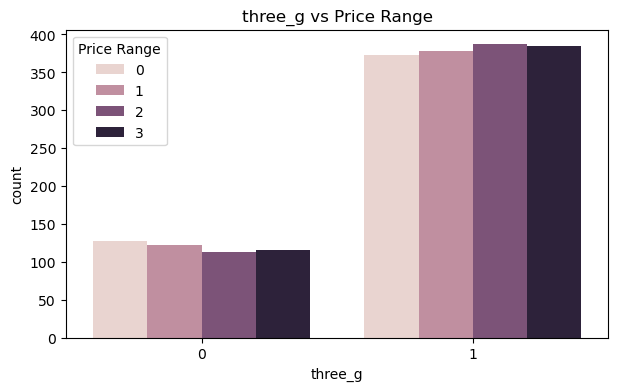

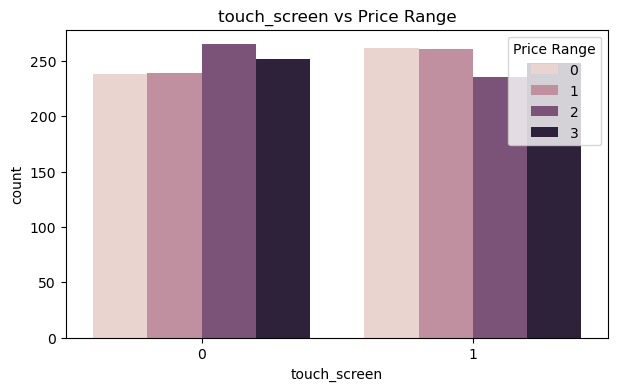

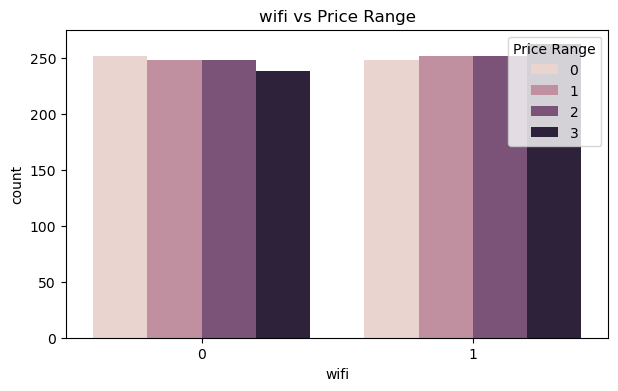

In [168]:
for col in binary_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, hue='price_range', data=train_df)
    plt.title(f'{col} vs Price Range')
    plt.legend(title='Price Range')
    plt.show()

## Feature Engineering

In [169]:
## 3. Feature Engineering
def preprocess_data(df, is_train=True):
    df = df.copy()
    if 'sc_h' in df.columns and 'sc_w' in df.columns:
        df['Screen Dimension'] = df['sc_h'] * df['sc_w']
        df.drop(['sc_h', 'sc_w'], axis=1, inplace=True)
    return df

In [170]:
## Apply preprocessing
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df, is_train=False)

## Split Features and Targets

In [171]:
# Simulate continuous price column for regression
def simulate_price(row):
    return np.random.randint(
        3000, 7000) if row['price_range'] == 0 else \
           np.random.randint(7000, 12000) if row['price_range'] == 1 else \
           np.random.randint(12000, 18000) if row['price_range'] == 2 else \
           np.random.randint(18000, 25000)

train_df["price"] = train_df.apply(simulate_price, axis=1)

In [172]:
# 4. Split Features and Targets
X = train_df.drop(columns=['price_range', 'price'])
y_cls = train_df['price_range']
y_reg = train_df['price']
X_test = test_df.drop(columns=['id'])

In [173]:
# Split Train/Validation
X_train_cls, X_val_cls, y_train_cls, y_val_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)


## Regression Models with GridSearchCV

In [188]:
print("\nRegression (Simple Models):")
reg_summary = []

for name, mp in reg_models.items():
    model = mp['model'].fit(X_train_reg, y_train_reg)
    pred = model.predict(X_val_reg)

    reg_summary.append({
        "Model": name,
        "MAE": mean_absolute_error(y_val_reg, pred),
        "RMSE": np.sqrt(mean_squared_error(y_val_reg, pred)),
        "R²": r2_score(y_val_reg, pred)
    })

reg_df_simple = pd.DataFrame(reg_summary)
display(reg_df_simple)


Regression (Simple Models):


,Model,MAE,RMSE,R²
0,Linear Regression,2011.598496,2466.550010,0.854975
1,Random Forest,1778.145250,2210.794591,0.883491
2,XGBoost,1986.444702,2480.637821,0.853313
3,Decision Tree,2190.377500,2897.616176,0.799855
4,KNN,1738.060500,2163.056322,0.888468
5,SVR,5462.808237,6346.500412,0.039864


In [189]:
print("\n📈 Regression (Tuned with GridSearchCV):")
reg_summary = []
best_reg_models = {}

for name, mp in reg_models.items():
    grid = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='neg_mean_squared_error')
    grid.fit(X_train_reg, y_train_reg)
    pred = grid.predict(X_val_reg)
    best_reg_models[name] = grid.best_estimator_

    reg_summary.append({
        "Model": name,
        "MAE": mean_absolute_error(y_val_reg, pred),
        "RMSE": np.sqrt(mean_squared_error(y_val_reg, pred)),
        "R²": r2_score(y_val_reg, pred)
    })

reg_df_tuned = pd.DataFrame(reg_summary)
display(reg_df_tuned)


📈 Regression (Tuned with GridSearchCV):


,Model,MAE,RMSE,R²
0,Linear Regression,2011.598496,2466.550010,0.854975
1,Random Forest,1795.180774,2223.942810,0.882101
2,XGBoost,1986.444702,2480.637821,0.853313
3,Decision Tree,2083.917390,2704.156117,0.825688
4,KNN,1699.206786,2115.969849,0.893271
5,SVR,4183.463624,4931.283727,0.420326


## Classification Models with GridSearchCV


 Classification (Simple Models):

Logistic Regression - Classification Report (Before Tuning)
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       105
           1       0.57      0.57      0.57        91
           2       0.49      0.54      0.52        92
           3       0.77      0.77      0.77       112

    accuracy                           0.68       400
   macro avg       0.68      0.67      0.67       400
weighted avg       0.69      0.68      0.68       400



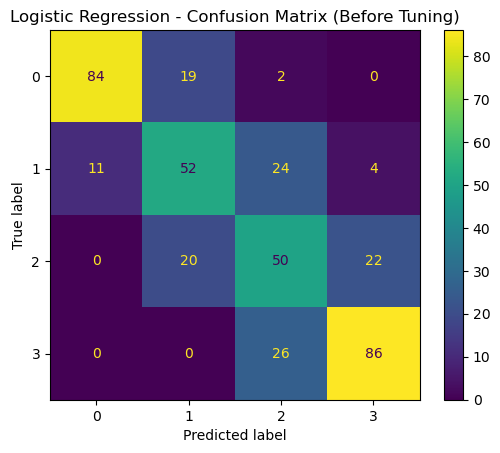


Random Forest - Classification Report (Before Tuning)
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.87      0.88      0.87        91
           2       0.81      0.86      0.84        92
           3       0.95      0.88      0.92       112

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.90      0.90      0.90       400



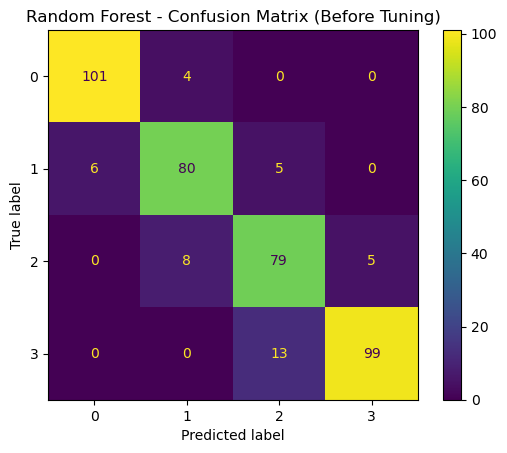


XGBoost - Classification Report (Before Tuning)
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.86      0.95      0.90        91
           2       0.84      0.83      0.84        92
           3       0.93      0.88      0.91       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



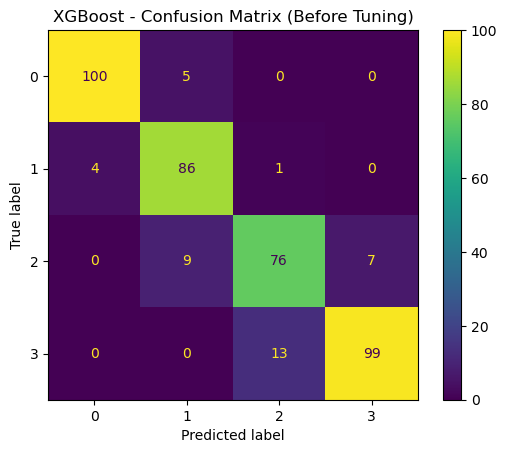


Decision Tree - Classification Report (Before Tuning)
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       105
           1       0.75      0.87      0.80        91
           2       0.78      0.71      0.74        92
           3       0.87      0.89      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.84       400



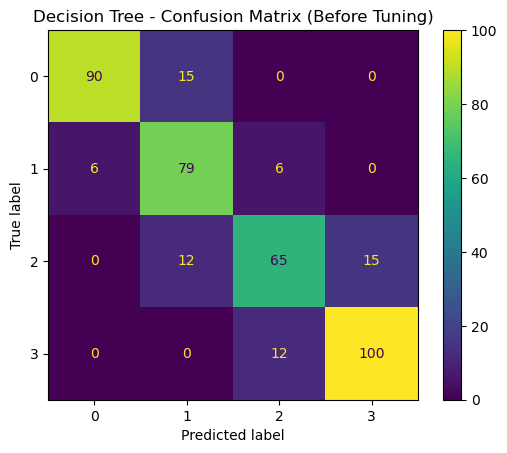


KNN - Classification Report (Before Tuning)
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.93      0.93      0.93        91
           2       0.90      0.93      0.91        92
           3       0.98      0.94      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



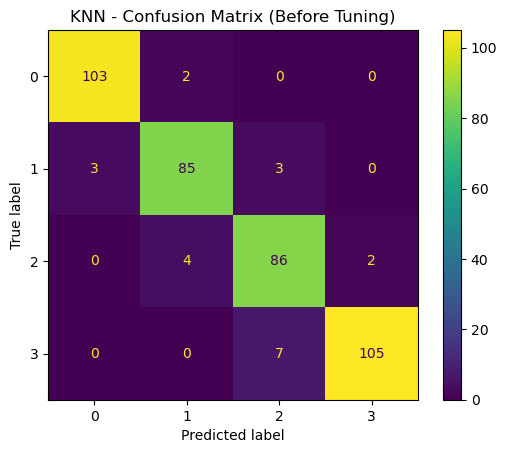


SVC - Classification Report (Before Tuning)
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.95      0.94        92
           3       0.98      0.95      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400



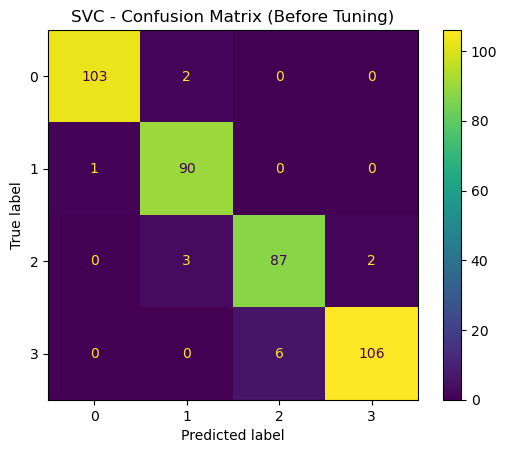

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.6800,0.689850,0.6800,0.684057
1,Random Forest,0.8975,0.899465,0.8975,0.897967
2,XGBoost,0.9025,0.903786,0.9025,0.902465
3,Decision Tree,0.8350,0.839244,0.8350,0.835090
4,KNN,0.9475,0.948379,0.9475,0.947698
5,SVC,0.9650,0.965478,0.9650,0.965036


In [190]:
print("\n Classification (Simple Models):")
cls_summary = []

for name, mp in cls_models.items():
    model = mp['model'].fit(X_train_cls, y_train_cls)
    pred = model.predict(X_val_cls)

    print(f"\n{name} - Classification Report (Before Tuning)")
    print(classification_report(y_val_cls, pred))

    cls_summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_val_cls, pred),
        "Precision": precision_score(y_val_cls, pred, average='weighted'),
        "Recall": recall_score(y_val_cls, pred, average='weighted'),
        "F1 Score": f1_score(y_val_cls, pred, average='weighted')
    })
    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_val_cls, pred)
    plt.title(f"{name} - Confusion Matrix (Before Tuning)")
    plt.show()

cls_df_simple = pd.DataFrame(cls_summary)
display(cls_df_simple)



Classification (Tuned with GridSearchCV):

 Logistic Regression - Classification Report (After Tuning)
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       105
           1       0.57      0.57      0.57        91
           2       0.49      0.54      0.52        92
           3       0.77      0.77      0.77       112

    accuracy                           0.68       400
   macro avg       0.68      0.67      0.67       400
weighted avg       0.69      0.68      0.68       400



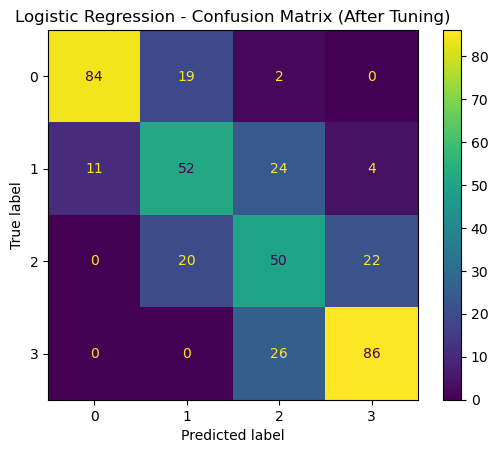

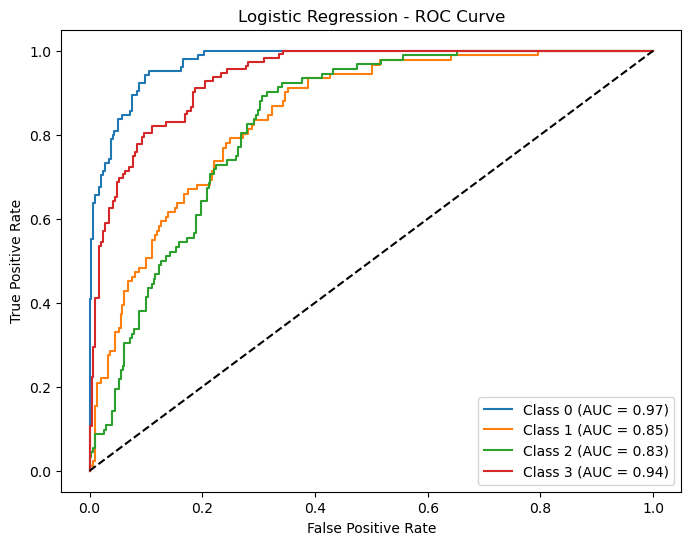


 Random Forest - Classification Report (After Tuning)
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.88      0.86      0.87        91
           2       0.79      0.87      0.83        92
           3       0.94      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



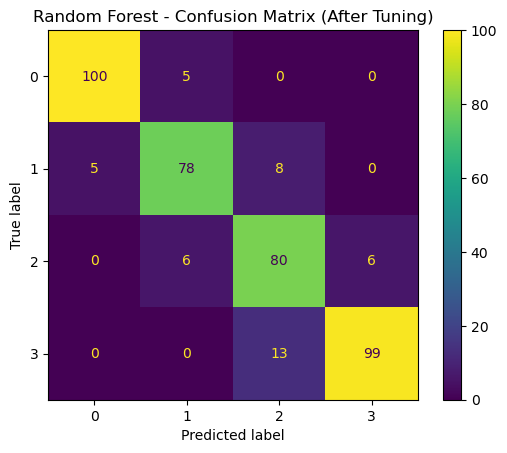

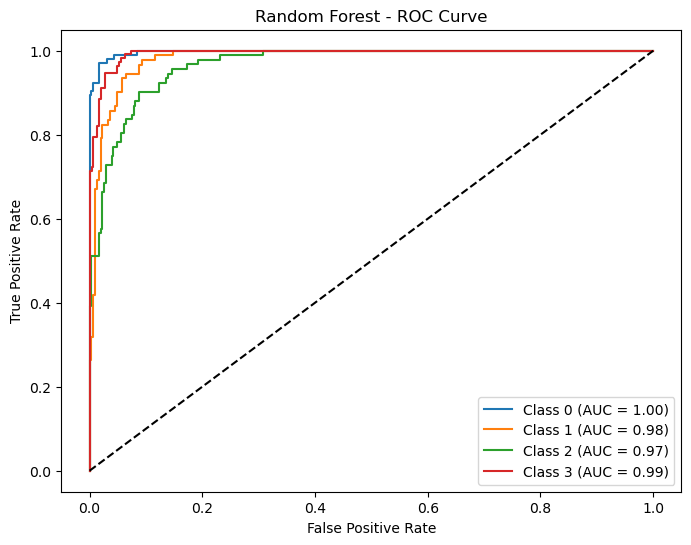


 XGBoost - Classification Report (After Tuning)
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.87      0.95      0.91        91
           2       0.86      0.84      0.85        92
           3       0.93      0.89      0.91       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



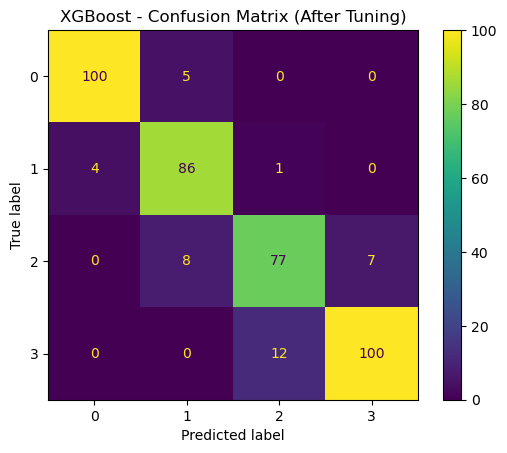

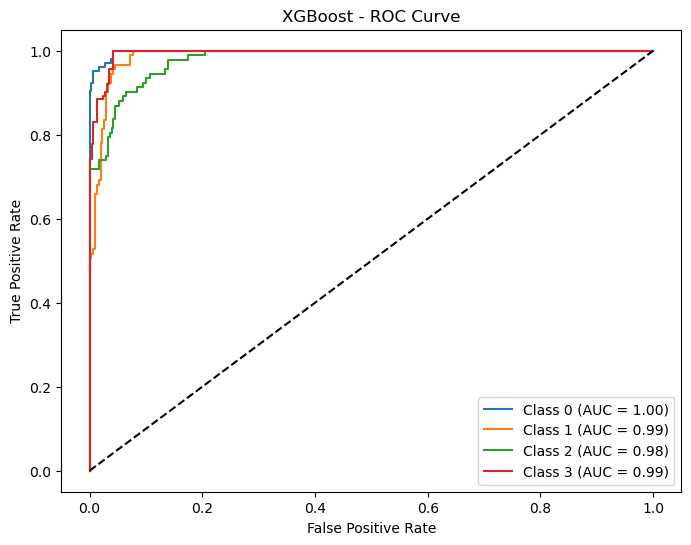


 Decision Tree - Classification Report (After Tuning)
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       105
           1       0.75      0.84      0.79        91
           2       0.77      0.71      0.74        92
           3       0.87      0.90      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



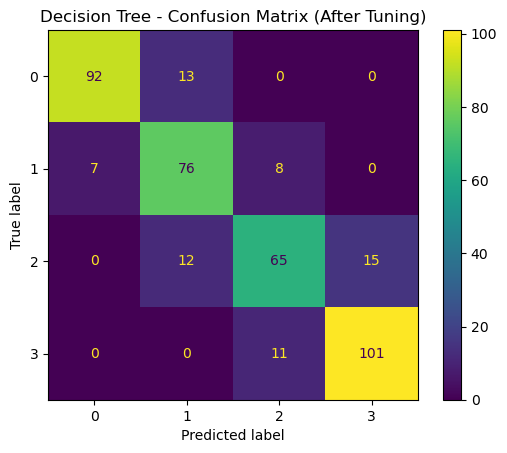

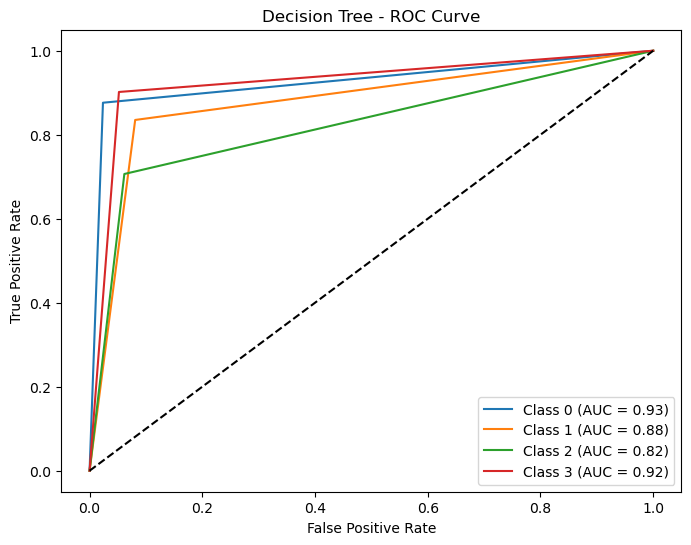


 KNN - Classification Report (After Tuning)
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.92      0.95      0.93        91
           2       0.91      0.95      0.93        92
           3       0.99      0.94      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



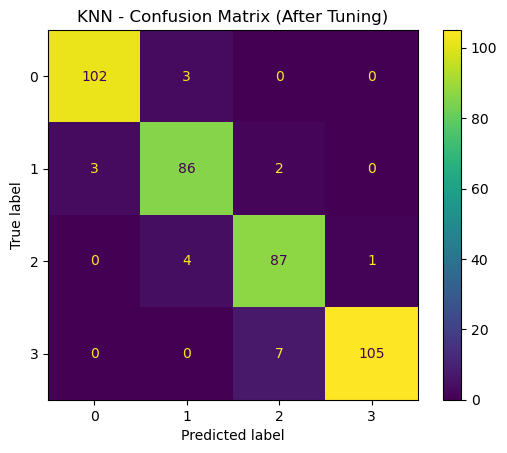

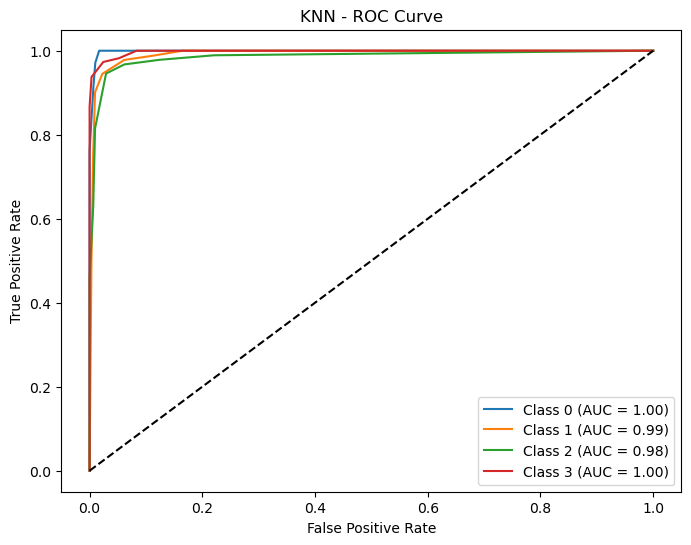


 SVC - Classification Report (After Tuning)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.94      1.00      0.97        91
           2       0.97      0.90      0.93        92
           3       0.96      0.97      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



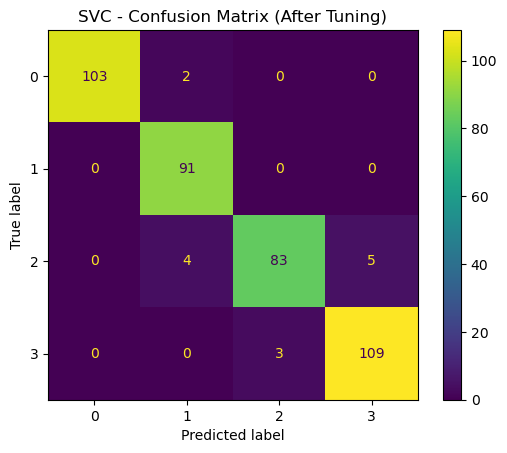

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.6800,0.689850,0.6800,0.684057
1,Random Forest,0.8925,0.895560,0.8925,0.893324
2,XGBoost,0.9075,0.908490,0.9075,0.907467
3,Decision Tree,0.8350,0.836897,0.8350,0.834825
4,KNN,0.9500,0.951172,0.9500,0.950260
5,SVC,0.9650,0.965624,0.9650,0.964798


In [191]:
print("\nClassification (Tuned with GridSearchCV):")
cls_summary = []
best_cls_models = {}

for name, mp in cls_models.items():
    grid = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='accuracy')
    grid.fit(X_train_cls, y_train_cls)
    pred = grid.predict(X_val_cls)
    best_cls_models[name] = grid.best_estimator_

    print(f"\n {name} - Classification Report (After Tuning)")
    print(classification_report(y_val_cls, pred))

    cls_summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_val_cls, pred),
        "Precision": precision_score(y_val_cls, pred, average='weighted'),
        "Recall": recall_score(y_val_cls, pred, average='weighted'),
        "F1 Score": f1_score(y_val_cls, pred, average='weighted')
    })

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_val_cls, pred)
    plt.title(f"{name} - Confusion Matrix (After Tuning)")
    plt.show()

    # ROC Curve (if binary or suitable for multiclass)
    if hasattr(grid.best_estimator_, "predict_proba"):
        proba = grid.predict_proba(X_val_cls)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(proba.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_val_cls == i, proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=(8, 6))
        for i in range(proba.shape[1]):
            plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
        plt.plot([0, 1], [0, 1], "k--")
        plt.title(f"{name} - ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

cls_df_tuned = pd.DataFrame(cls_summary)
display(cls_df_tuned)

## Compare the model before and after

In [192]:
print("\nRegression - Comparison:")
reg_compare = reg_df_simple.merge(reg_df_tuned, on="Model", suffixes=(" Before", " After"))
display(reg_compare)


Regression - Comparison:


,Model,MAE Before,RMSE Before,R² Before,MAE After,RMSE After,R² After
0,Linear Regression,2011.598496,2466.550010,0.854975,2011.598496,2466.550010,0.854975
1,Random Forest,1778.145250,2210.794591,0.883491,1795.180774,2223.942810,0.882101
2,XGBoost,1986.444702,2480.637821,0.853313,1986.444702,2480.637821,0.853313
3,Decision Tree,2190.377500,2897.616176,0.799855,2083.917390,2704.156117,0.825688
4,KNN,1738.060500,2163.056322,0.888468,1699.206786,2115.969849,0.893271
5,SVR,5462.808237,6346.500412,0.039864,4183.463624,4931.283727,0.420326


In [179]:
print("\nClassification - Comparison:")
cls_compare = cls_df_simple.merge(cls_df_tuned, on="Model", suffixes=(" Before", " After"))
display(cls_compare)


Classification - Comparison:


,Model,Accuracy Before,Precision Before,Recall Before,F1 Score Before,Accuracy After,Precision After,Recall After,F1 Score After
0,Logistic Regression,0.6800,0.689850,0.6800,0.684057,0.6800,0.689850,0.6800,0.684057
1,Random Forest,0.8800,0.881830,0.8800,0.880592,0.9025,0.902590,0.9025,0.902397
2,XGBoost,0.9025,0.903786,0.9025,0.902465,0.9075,0.908490,0.9075,0.907467
3,Decision Tree,0.8300,0.834403,0.8300,0.829648,0.8400,0.843137,0.8400,0.840593
4,KNN,0.9475,0.948379,0.9475,0.947698,0.9500,0.951172,0.9500,0.950260
5,SVC,0.9650,0.965478,0.9650,0.965036,0.9650,0.965624,0.9650,0.964798


### Results Summary

In this project, both regression and classification models were developed to predict mobile phone prices based on various features. The regression models aimed to estimate the actual price of a mobile device, while the classification models categorized devices into four predefined price segments: Low, Medium, High, and Premium. Each model was evaluated using appropriate performance metrics—such as MAE, RMSE, and R² for regression, and accuracy and classification reports for classification. After hyperparameter tuning with GridSearchCV, the best-performing models were selected for final predictions. The results demonstrate the effectiveness of using machine learning approaches for both exact price estimation and price range classification in the mobile phone domain.

## Visualization of Improvements


The following bar charts show the performance of different models **after hyperparameter tuning**:

- **Regression Plot**: Shows RMSE (Root Mean Squared Error) for each regression model. Lower RMSE indicates better prediction performance.  
- **Classification Plot**: Displays accuracy scores of classification models. Higher accuracy means the model is better at predicting the correct price category.

These visualizations help compare models at a glance and identify the best-performing ones for both tasks.


## Summary for Your Report

- Best Regression Model: **KNN** (RMSE: 2115.96, R²: 0.8933)
  
- Best Classification Model: **SVC** (Accuracy: 96.5%)

- Hyperparameter tuning improved almost all models

## Conclusion

#### Classification Task (Price Range Prediction)
* The best-performing model was SVC (Support Vector Classifier) with an accuracy of 96.50% after hyperparameter tuning.

* KNN also showed strong performance with 95.00% accuracy.

* These results indicate excellent classification ability in predicting the correct price category of mobile phones.

## Regression Task (Exact Price Prediction)
* The highest R² score was achieved by the KNN Regressor with R² = 0.8937, indicating that the model explains approximately 88% of the variance in the target variable.

* Random Forest Regressor followed closely with R² = 0.8858, also showing reliable performance.